<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-simulation:-regression" data-toc-modified-id="Data-simulation:-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data simulation: regression</a></span></li><li><span><a href="#Data-splitting" data-toc-modified-id="Data-splitting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data splitting</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Fitting-(QR)" data-toc-modified-id="Fitting-(QR)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fitting (QR)</a></span></li><li><span><a href="#Prediction-(QR)" data-toc-modified-id="Prediction-(QR)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Prediction (QR)</a></span></li><li><span><a href="#What-about-coverage?-(QR)" data-toc-modified-id="What-about-coverage?-(QR)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>What about coverage? (QR)</a></span></li><li><span><a href="#Data-splitting-(need-of-a-calibration-set)-+-preparation-(SCP)" data-toc-modified-id="Data-splitting-(need-of-a-calibration-set)-+-preparation-(SCP)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data splitting (need of a calibration set) + preparation (SCP)</a></span></li><li><span><a href="#Defining-a-score-(SCP)" data-toc-modified-id="Defining-a-score-(SCP)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Defining a score (SCP)</a></span></li><li><span><a href="#Fitting-(SCP)" data-toc-modified-id="Fitting-(SCP)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Fitting (SCP)</a></span></li><li><span><a href="#Calibration-scores-(SCP)" data-toc-modified-id="Calibration-scores-(SCP)-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Calibration scores (SCP)</a></span></li><li><span><a href="#Prediction-(SCP)" data-toc-modified-id="Prediction-(SCP)-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Prediction (SCP)</a></span></li><li><span><a href="#Coverage-(SCP)" data-toc-modified-id="Coverage-(SCP)-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Coverage (SCP)</a></span></li><li><span><a href="#Fitting-(CQR)" data-toc-modified-id="Fitting-(CQR)-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Fitting (CQR)</a></span></li><li><span><a href="#Calibration-scores-(CQR)" data-toc-modified-id="Calibration-scores-(CQR)-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Calibration scores (CQR)</a></span></li><li><span><a href="#Prediction-(CQR)" data-toc-modified-id="Prediction-(CQR)-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Prediction (CQR)</a></span></li><li><span><a href="#Coverage-(CQR)" data-toc-modified-id="Coverage-(CQR)-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Coverage (CQR)</a></span></li></ul></div>

# Tutorial: conformal prediction (regression)


In [1]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'TutoCP',
    'session_owner': 'aymeric',
    'sender_name': input("Your name:"),
}
send('started', 0)


# The ''send'' function enables us to see which question you have reached
# If this cell keeps runnning for more than a minute, restart kernel 
# If it happens again, redefine 
# def send(a,b): return()

import random
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [43]:
colors_blindness = sns.color_palette("colorblind")

In [44]:
color_train = colors_blindness[1]
color_cal = colors_blindness[9]
color_test = colors_blindness[7] #(0,0,0) #colors_blindness[4]

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

1. [Data simulation: regression](#Data-simulation:-regression)
1. [Standard regression](#Standard-regression)
    1. [Data splitting](#data-splitting1)
    1. [Data preparation](#data-preparation1)
    1. [Fitting](#fitting1)
    1. [Prediction](#prediction1)
1. [Quantile regression](#Quantile-regression-(QR))
    1. [Fitting](#fitting2)
    1. [Prediction](#prediction2)
1. [Split Conformal Prediction (SCP): standard regression](#Split-Conformal-Prediction-(SCP):-standard-regression)
    1. [Data splitting & preparation](#data-splitting-(SCP))
    1. [Defining a score](#defining-a-score-(SCP))
    1. [Fitting](#fitting-(SCP))
    1. [Calibration scores](#calibration-scores-(SCP))
    1. [Prediction](#prediction-(SCP))
    1. [Coverage](#coverage-(SCP))
1. [Conformalized Quantile Regression (CQR)](#Conformalized-Quantile-Regression-(CQR))
    1. [Fitting](#fitting-(CQR))
    1. [Calibration scores](#calibration-scores-(CQR))
    1. [Prediction](#prediction-(CQR))
    1. [Coverage](#coverage-(CQR))
      
<!--1. [Split Conformal Prediction (SCP): classification](#Split-Conformal-(SCP):-classification)
    1. [Data splitting](#data-splitting-(SCP)-classif)
    1. [Data preparation](#data-preparation-(SCP)-classif)
    1. [Defining a score](#defining-a-score-(SCP)-classif)
    1. [Fitting](#fitting-(SCP)-classif)
    1. [Calibration scores](#calibration-scores-(SCP)-classif)
    1. [Prediction](#prediction-(SCP)-classif)
1. [Conformalized Quantile Regression (CQR): classification](#Conformalized-Quantile-Regression-(CQR):-classification)
    1. [Defining a score](#defining-a-score-(CQR)-classif)
    1. [Fitting](#fitting-(CQR)-classif)
    1. [Calibration scores](#calibration-scores-(CQR)-classif)
    1. [Prediction](#prediction-(CQR)-classif)-->



## Data simulation: regression

<div class="alert alert-block alert-info"> First we generate data $(X_i,Y_i)_i$ where $X_i \sim \mathcal{U}([0,1])$ and $Y_i\in\mathbb{R}$ (regression). </div> 

In [46]:
np.random.seed(43)

n = 300
X = np.random.uniform(low=0,high=5,size=n)
sigma = 1

## Homoscedastic model
# Y = np.cos(X) + sigma*np.random.normal(size=n)

## Heteroscedastic model
y = np.cos(X) + (1-np.cos(X))*sigma*np.random.normal(size=n)

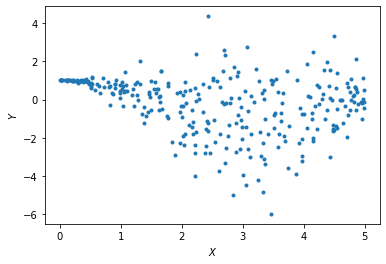

In [47]:
plt.scatter(X,y,marker='.')
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.show()

# "Standard" regression

<div class="alert alert-block alert-info"> In this section, we aim at training a "standard" predictor: a polynomial regressor. To do so, we apply a polynomial transform to the data before training a classical linear model. </div> 


<div id="data-splitting1"> </div>

## Data splitting



In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

<div id="data-preparation1"> </div>

## Data preparation

In [23]:
# Data preparation (embedding)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
Xpoly_train = # YOUR CODE HERE
Xpoly_test  = # YOUR CODE HERE


<div id="fitting1"> </div>

## Fitting

In [24]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=False)

# Fit linear regression
#
# YOUR CODE HERE
#


LinearRegression(fit_intercept=False)

<div id="prediction1"></div>

## Prediction

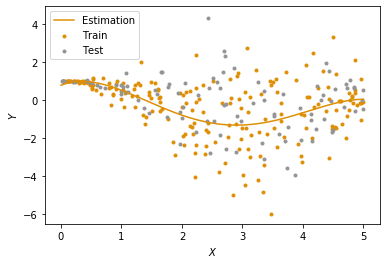

In [28]:
# Visualization
plt.scatter(X_train,y_train,marker='.',color=color_train,label="Train")
plt.scatter(X_test,y_test,marker='.',color=color_test,label="Test")
aux = np.linspace(0,5,500)
auxpoly = poly.fit_transform(aux[:, np.newaxis])
plt.plot(aux,linear_reg.predict(auxpoly),color=color_train,label="Estimation")
plt.legend()
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
send(plt, 1)

plt.show()


In [29]:
# Some metrics of performance
y_pred = linear_reg.predict(Xpoly_test)
Rtwo_linear_reg = linear_reg.score(Xpoly_test,y_test)
print("R2 for linear regression (polynomial features): ",Rtwo_linear_reg)
RMSE_linear_reg = np.sqrt(np.mean((y_pred-y_test)**2))
print("RMSE for linear regression (polynomial features): ",RMSE_linear_reg)
RMSE_mean = np.sqrt(np.mean((np.mean(y_train)-y_test)**2))
print("RMSE for mean predictor: ",RMSE_mean)

R2 for linear regression (polynomial features):  0.014055202278444479
RMSE for linear regression (polynomial features):  1.3694232362095446
RMSE for mean predictor:  1.408447045275046


<div class="alert alert-block alert-success"> The polynomial regressor remains relevant compared to the baseline (mean predictor).  </div>

# Quantile regression (QR) 

<div class="alert alert-block alert-info"> 
    Quantile regression is a statistical technique used to estimate the conditional quantiles of a response variable given a set of predictor variables. Unlike traditional regression models that estimate the conditional mean of the response variable, quantile regression estimates the conditional median or other quantiles of the response variable.
For a quantile level $\beta$, learning a quantile regressor amounts to changing the risk to be minimized:
$
\begin{align}
\text{Risk}_{\beta}(f) = \mathbb{E}\left[ \text{pinball}_{\beta}(Y, f(X)) \right]
\end{align}
$
</div> 
    
<div class="alert alert-block alert-info"> In the following blocks, train two quantile regressors with quantile levels 0.05 and 0.95.
</div> 



<div id="fitting2"></div>

## Fitting (QR)



In [2]:
from sklearn.linear_model import QuantileRegressor

from sklearn.utils.fixes import sp_version, parse_version

## a good idea is to update scipy (!) to avoid problem of convergence
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

beta = 0.1
qr_down = QuantileRegressor(quantile=beta/2, alpha=0,solver='highs')
qr_up = QuantileRegressor(quantile=1-beta/2, alpha=0,solver='highs')
qr_med = QuantileRegressor(quantile=0.5, alpha=0,solver='highs')

# Fit Upper and Lower Quantile regression and median
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE



ImportError: cannot import name 'QuantileRegressor'

<div id="prediction2"></div>

## Prediction (QR) 

In [34]:
plt.plot(aux,qr_up.predict(auxpoly),'--',color=color_train,label="q sup")
plt.plot(aux,qr_down.predict(auxpoly),'--',color=color_train,label="q inf")
plt.plot(aux,qr_med.predict(auxpoly),'-',color=color_train,label="median")
plt.plot(aux,linear_reg.predict(auxpoly),'-',color=color_test,label="poly reg")
plt.scatter(X_test,y_test,marker='.',color=color_test,zorder=2)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend()
#plt.savefig('quantile_reg.pdf', bbox_inches='tight',dpi=300)
send(plt, 2)
plt.show()

NameError: name 'qr_up' is not defined

## What about coverage? (QR)

In [ ]:
y_up_train = qr_up.predict(Xpoly_train)
y_up_test = qr_up.predict(Xpoly_test)
y_down_train = qr_down.predict(Xpoly_train)
y_down_test = qr_down.predict(Xpoly_test)

In [ ]:
# Count how many times the true label was indeed 
# in the prediction interval on the test set



# Compute and print theoretical and empirical coverage
theor_cov = # YOUR CODE HERE

prop_covered_qr  = # YOUR CODE HERE
print("Theoretical coverage: ", theor_cov)
print("Empirical coverage with QR: ", prop_covered_qr)

send(["Theoretical coverage: ", theor_cov], 3)
send(["Empirical coverage: ", prop_covered_qr], 4)

<div class="alert alert-block alert-success"> The main advantage of quantile regression is that it provides a more complete picture of the relationship between the predictor variables and the response variable, especially in cases where the conditional distribution of the response variable is not symmetric
the tails of the distribution are of interest.
    
  While it has many strengths, there are also several limitations to consider when using this approach:

<ul>
    <li>Limited to Continuous Outcomes: Quantile regression is limited to modeling the relationship between a predictor variable and a continuous outcome variable, so it cannot be used for categorical or binary outcomes.</li>
    <li> Interpretation of Results: The interpretation of results can be challenging, especially for non-statisticians. Each quantile corresponds to a different conditional distribution of the outcome variable, which can make it difficult to summarize the overall effect of a predictor on the outcome.</li>
    <li> Sample Size: A large sample size is required for accurate estimation of the regression coefficients for each quantile. When the sample size is small, the estimates can be imprecise and unreliable.</li> 
    <li> Covariate Selection: Choosing which covariates to include in the model can be challenging, as the relationship between the outcome variable and each covariate may vary across different quantiles. It is recommended to use an iterative approach to model selection, considering both statistical significance and practical significance of the covariates.</li>
    </ul>

</div>

# Split Conformal Prediction (SCP): regression

<div class="alert alert-block alert-info">  The split conformal prediction procedure is a method for constructing prediction intervals for a new observation based on a training dataset. It involves splitting the training dataset into two parts: a <b>calibration</b> set and a <b>proper training</b> set.
    <ul>
        <li> The proper training set is used to train the model. </li> 
        <li> The <b>calibration</b> set is used to estimate the distribution of the error of the model. </li>
    </ul>
    <br>
    <br>
    The prediction interval is then constructed by combining the estimated error distribution with the prediction of the model for the new observation. This procedure ensures that the prediction interval is valid in the sense that it contains the true value of the new observation with a certain probability. 
</div>

<div id="data-splitting-(SCP)"> </div>

## Data splitting (need of a calibration set) + preparation (SCP)


In [ ]:
from sklearn.model_selection import train_test_split

# Data splitting (achtung: overwriting on train data)
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  random_state=42)
Xpoly_train = poly.fit_transform(X_train[:, np.newaxis])
Xpoly_cal = poly.fit_transform(X_cal[:, np.newaxis])


In [ ]:
# Visualization

plt.figure()
plt.scatter(X_train,y_train,marker='.',color=color_train,label="Train")
plt.scatter(X_cal,y_cal,marker='.',color=color_cal,label="Cal")
plt.scatter(X_test,y_test,marker='.',color=color_test,label="Test")
plt.legend(loc=(1.04, 0.25))
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
send(plt, 5)
plt.show()

<div id="defining-a-score-(SCP)"> </div>

## Defining a score (SCP)

In [11]:
def my_score(y_pred, y):
    #
    # YOUR CODE HERE
    #


send(my_score, 6)

<Response [200]>

<div id="fitting-(SCP)"> </div>

## Fitting (SCP)

In [12]:
linear_reg = LinearRegression(fit_intercept=False)
linear_reg.fit(Xpoly_train,y_train)

NameError: name 'LinearRegression' is not defined

<div id="calibration-scores-(SCP)"> </div>

## Calibration scores (SCP)

Compute the calibration scores on the calibration set, and the associated quantile.

In [10]:
residuals_cal = # YOUR CODE HERE
n_cal = # YOUR CODE HERE
quantile_scp = # YOUR CODE HERE

send([residuals_cal,n_cal,quantile_scp], 7)

NameError: name 'my_score' is not defined

<div id="prediction-(SCP)"> </div>

## Prediction (SCP)

Plot the prediction interval on the test set using the functions 'plot' and 'fill_between' of matplotlib.  

In [12]:
plt.scatter(X_test,y_test,marker='.',color=color_test,zorder=2, s=50)

# Compute y_pred_test
y_pred_test = # YOUR CODE HERE


#
#
# YOUR CODE HERE
#
#

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
send(plt, 8)
plt.show()


NameError: name 'X_test' is not defined

<div id="coverage-(SCP)"> </div>

## Coverage (SCP)

In [ ]:
# Count how many times the true label was indeed 
# in the prediction interval on the test set

prop_covered_scp = np.sum(((y_pred_test-quantile_scp)<=y_test)*(y_test<= # YOUR CODE HERE

# Print coverages
print("Theoretical coverage: ",1-beta)
print("Empirical coverage with QR: ",prop_covered_qr)
print("Empirical coverage with SCP: ",prop_covered_scp) 

send(["Theoretical / Empirical QR / Empirical SCP",1-beta,prop_covered_qr,prop_covered_scp])



<div class="alert alert-block alert-success"> Split conformal prediction comes with a theoretical coverage guarantee (contrary to quantile regression).
    Some limitation to be noted are:
    <ul>
    <li>Dependence on data split: The performance of split conformal prediction can be heavily dependent on the particular data split used for training and validation. Different splits can result in different prediction intervals.</li>
    <li>Limited to exanchageable data (often i.i.d.): Split conformal prediction assumes that the data is exchangeable, which may not be the case for all data sets. </li>
    <li>Inefficient use of data: Split conformal prediction requires a separate validation set, which can reduce the amount of data available for training the model. This can be particularly problematic when data is limited or the model is complex.</li>
        <li> Split conformal prediction outputs <b>non-adaptive intervals</b> to the test point. 
    </ul>
</div>

<div id="Conformalized-Quantile-Regression-(CQR)"> </div>

# Conformalized Quantile Regression (CQR) 


<div class="alert alert-block alert-info">
Conformalized quantile regression is a statistical technique that combines the concepts of quantile regression and conformal prediction to provide prediction intervals that are valid with high probability (which is not the case when resorting to quantile regression only). This methods provides <b> adaptive </b> prediction sets to the test point in play. 
    
</div>

<div id="fitting-(CQR)"> </div>

## Fitting (CQR)

Train two quantile regressors of levels 0.05 and 0.95. 

In [ ]:
from sklearn.linear_model import QuantileRegressor

from sklearn.utils.fixes import sp_version, parse_version

## a good idea is to update scipy (!) to avoid problem of convergence
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

beta = 0.1

# Fit upper and lower quantiles
qr_down = # YOUR CODE HERE
qr_up = # YOUR CODE HERE
# Fitting  regression
# YOUR CODE HERE
# YOUR CODE HERE

#qr_med = QuantileRegressor(quantile=0.5, alpha=0,solver='highs')
#qr_med.fit(Xpoly_train, y_train)

<div id="calibration-scores-(CQR)"> </div>

## Calibration scores (CQR)

Compute the calibration scores. 

In [ ]:
y_down_cal = # YOUR CODE HERE
y_up_cal = # YOUR CODE HERE

#signed scores
residuals_cal = # YOUR CODE HERE

n_cal = # YOUR CODE HERE
quantile_cqr = # YOUR CODE HERE


<div id="prediction-(CQR)"> </div>

## Prediction (CQR)

Illustrate the prediction sets on the test set.

In [ ]:
# prediction on test
y_down_test = # YOUR CODE HERE
y_up_test = # YOUR CODE HERE

# prediction interval

#
#
# YOUR CODE HERE
#
#

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('CQR_2.pdf', bbox_inches='tight',dpi=300)
plt.send()
plt.show()


<div id="coverage-(CQR)"> </div>

## Coverage (CQR)

In [13]:
# Count how many times the true label was indeed 
# in the prediction interval on the test set

prop_covered_cqr = np.sum(((y_down_test-quantile_cqr)<=y_test)*(y_test<= # YOUR CODE HERE
print("Theoretical coverage: ",1-beta)
print("Empirical coverage with QR: ",prop_covered_qr)
print("Empirical coverage with SCP: ",prop_covered_scp) 
print("Empirical coverage with CQR: ",prop_covered_cqr)


send(["Theoret/ Emp_QR / Emp_SCP / EMP_CQR ",1-beta,prop_covered_qr,prop_covered_scp,prop_covered_cqr])


NameError: name 'y_down_test' is not defined

In [ ]:
## Plot the histogram of the interval lengths of SCP vs. CQR

<div class="alert alert-block alert-success">
By providing data-dependent prediction interval, conformalized quantile regression is particularly adapted here, with such an heteroscedastic model.
    <br>
    <br>
 This histogram helps us in two ways. Firstly, a large average set size indicates the conformal procedure is not very precise, indicating a possible problem with the score or underlying model. Secondly, the spread of the set sizes shows whether the prediction sets properly adapt to the difficulty of examples. A wider spread is generally desirable, since it means that the procedure is effectively distinguishing between easy and hard inputs.
    <br>
    <br>
    A good spread of set sizes is generally better, but it does not necessarily
indicate that the sets adapt properly to the difficulty of X. Above seeing that the set sizes have dynamic range, we need to verify that large sets occur for hard examples.
</div>

# Improving the use of data: Jackknife+/CV

In [ ]:
### If you reach this cell, do not hesitate to code 
## your own jackknife+ / CV conformal prediction